# **Este dataset contém** 
* produção de 20 operadores em uma indústria fictícia.

Este conjunto de dados contém detalhes de 500 peças produzidas por cada um dos 20 operadores de uma indústria em um período de tempo. As medidas perfeitas não foram incluídas no contexto.
Cada operador tem um histórico de treinamento diferente.

**Colunas:**

* Item número
* Comprimento
* Largura
* Altura
* Operador

In [1]:
!pip install tensorflow 

In [2]:
!pip install keras 

## Importação das bibliotecas:

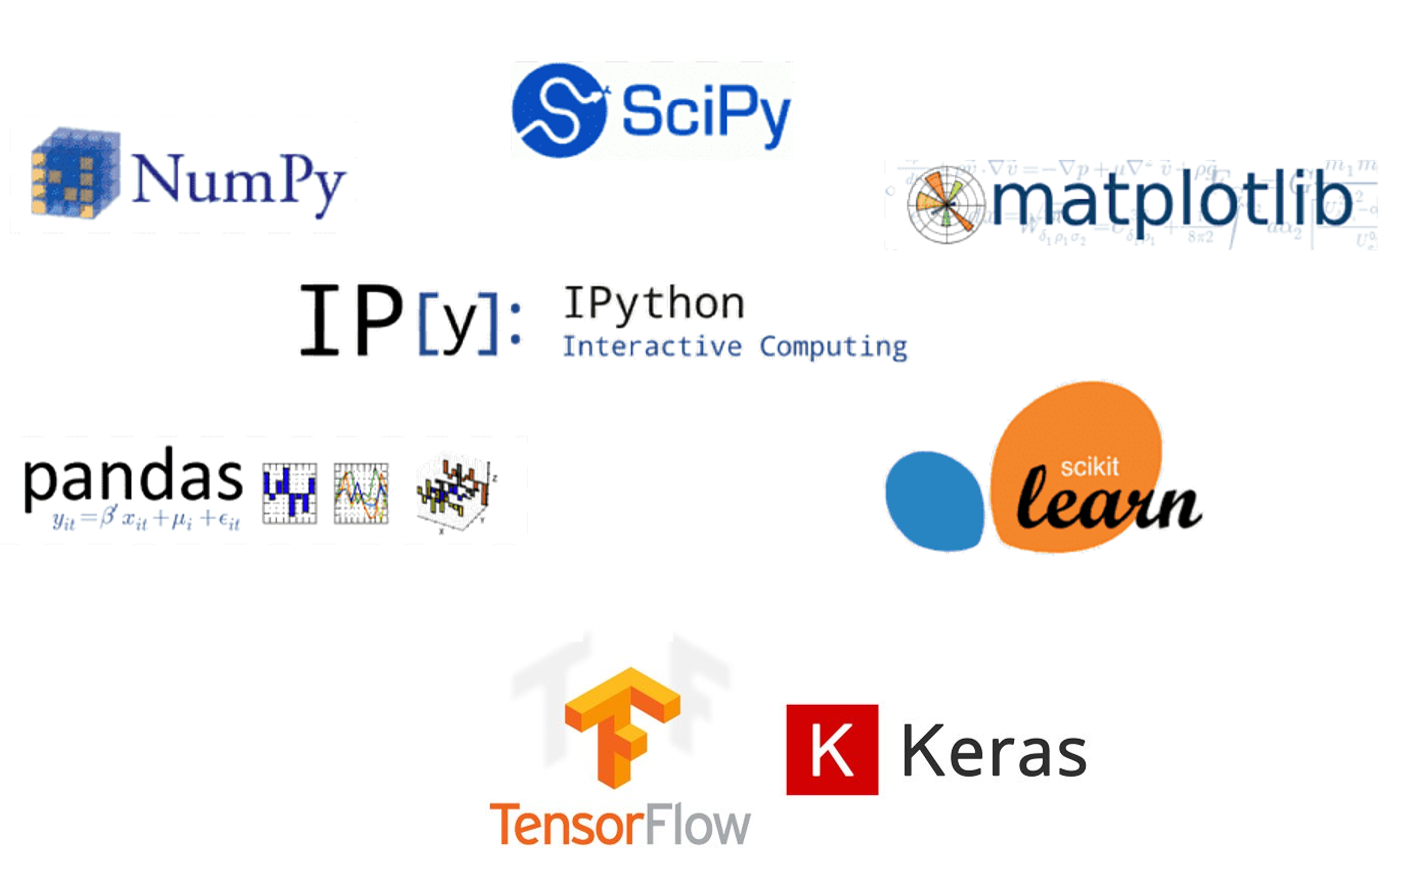


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from scipy.stats import binom
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

### Carregando o dataset

In [4]:
df = pd.read_csv("C:/Users/dougl/OneDrive/Área de Trabalho/Treino_ML/Piece_Dimension.csv")
df.head()

,Item_No,Length,Width,Height,Operator
0,1,102.67,49.53,19.69,Op-1
1,2,102.50,51.42,19.63,Op-1
2,3,95.37,52.25,21.51,Op-1
3,4,94.77,49.24,18.60,Op-1
4,5,104.26,47.90,19.46,Op-1


In [5]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Item_No   500 non-null    int64  
 1   Length    500 non-null    float64
 2   Width     500 non-null    float64
 3   Height    500 non-null    float64
 4   Operator  500 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 19.7+ KB


In [7]:
df.describe()

,Item_No,Length,Width,Height
count,500.000000,500.000000,500.00000,500.000000
mean,250.500000,99.769140,49.93288,20.293220
std,144.481833,4.107471,2.11382,1.051718
min,1.000000,87.520000,42.74000,17.370000
25%,125.750000,96.835000,48.34000,19.475000
50%,250.500000,99.565000,49.82500,20.310000
75%,375.250000,102.035000,51.46250,21.142500
max,500.000000,116.600000,58.26000,23.390000


### Na coluna "Item_No" não tem importância para a análise, logo será descartada

In [8]:
df = df.drop('Item_No', axis=1)

In [9]:
df.head()

,Length,Width,Height,Operator
0,102.67,49.53,19.69,Op-1
1,102.50,51.42,19.63,Op-1
2,95.37,52.25,21.51,Op-1
3,94.77,49.24,18.60,Op-1
4,104.26,47.90,19.46,Op-1


### Criação de uma nova coluna para análise dos dados

In [10]:
df['Volume'] = (df['Length'] * df['Width'] * df['Height']).round(2)
df.head()

,Length,Width,Height,Operator,Volume
0,102.67,49.53,19.69,Op-1,100128.48
1,102.50,51.42,19.63,Op-1,103460.90
2,95.37,52.25,21.51,Op-1,107186.10
3,94.77,49.24,18.60,Op-1,86796.43
4,104.26,47.90,19.46,Op-1,97184.29


In [11]:
max_volume = df['Volume'].max()
min_volume = df['Volume'].min()

print('Nós devemos considerar um pacote com o volume de: \n' + str(max_volume))
print('Nós devemos também considerar um preenchimento interno do pacote com o volume de: \n' + str(max_volume - min_volume))

Nós devemos considerar um pacote com o volume de: 
146754.61
Nós devemos também considerar um preenchimento interno do pacote com o volume de: 
71750.93


# Análise Exploratória

<AxesSubplot:title={'center':'Apontamento Produção - Operador'}, xlabel='Operator', ylabel='count'>

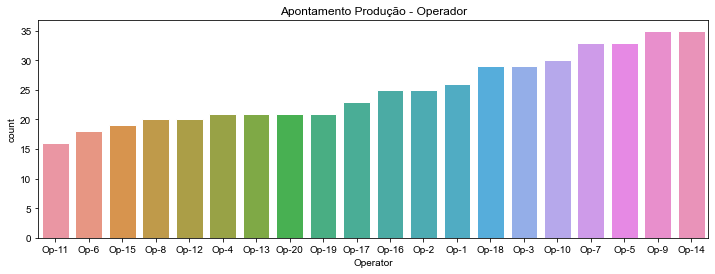

In [12]:
plt.figure(figsize=(12,4))
plt.title('Apontamento Produção - Operador') 

sns.set_theme(style="whitegrid")

sns.countplot(data=df, x='Operator', order=df['Operator'].value_counts().index[::-1])

#### Assim temos a quantidade de peças feitas por cada operador em um turno de trabalho.

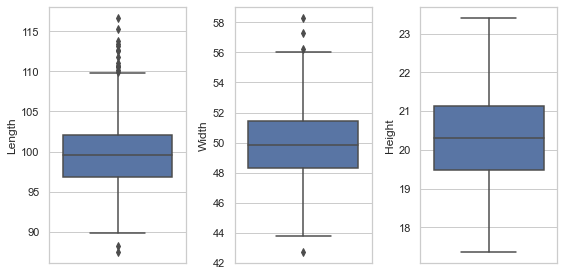

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,4))

sns.boxplot(data=df, y=df['Length'], ax=axes[0])
sns.boxplot(data=df, y=df['Width'], ax=axes[1])
sns.boxplot(data=df, y=df['Height'], ax=axes[2])

fig.tight_layout()

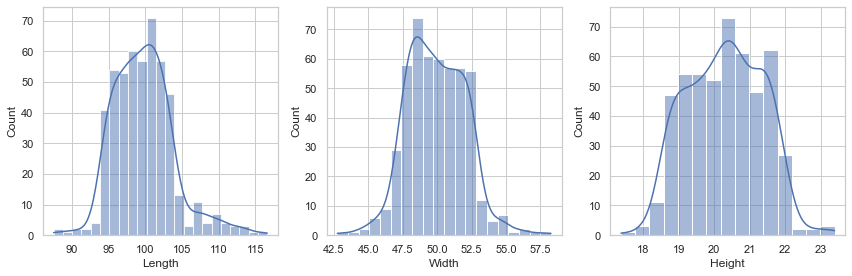

In [14]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

sns.histplot(data=df, x=df['Length'], kde=True, ax=axes[0])
sns.histplot(data=df, x=df['Width'], kde=True, ax=axes[1])
sns.histplot(data=df, x=df['Height'], kde=True, ax=axes[2])


fig.tight_layout()

#### Formando a parceria de variáveis

In [15]:
parceria = ['Length', 'Width', 'Height']

In [16]:
for col in parceria:
    print(col)
    print(pd.Series(boxplot_stats(df[col])[0]))
    print('\n')

Length
mean                                               99.76914
iqr                                                     5.2
cilo                                              99.199895
cihi                                              99.930105
whishi                                               109.79
whislo                                                89.82
fliers    [87.52, 88.28, 110.54, 110.18, 110.72, 112.69,...
q1                                                   96.835
med                                                  99.565
q3                                                  102.035
dtype: object


Width
mean                          49.93288
iqr                             3.1225
cilo                         49.605761
cihi                         50.044239
whishi                           56.04
whislo                            43.8
fliers    [42.74, 57.26, 58.26, 56.26]
q1                               48.34
med                             49.825
q3                  

#### Detalhes:
* Quando chamamos a função 'get_status()', se chama cada linha por vez
* row é uma pd.Series
* Na função serão avaliadas 3 colunas, caso não esteja dentro do parâmetro, a função retornará 'defeito'.

In [17]:
def get_status(row):
    for col in parceria:
        if(
            (row[col] > boxplot_stats(df[col])[0]['whishi'])
            or
            (row[col] < boxplot_stats(df[col])[0]['whislo'])
          ):
            
            return 'Defeituosa'
        return 'Perfeita'
df['Status'] = df.apply(get_status, axis=1)

In [18]:
#df[df['Length'] < boxplot_stats(df['Length'])[0]['whislo']]

In [19]:
df[df['Status']=='Defeituosa']

,Length,Width,Height,Operator,Volume,Status
41,110.54,51.07,21.95,Op-2,123913.85,Defeituosa
56,110.18,51.89,21.36,Op-3,122120.25,Defeituosa
63,110.72,52.54,21.06,Op-3,122510.84,Defeituosa
67,112.69,50.68,20.33,Op-3,116107.26,Defeituosa
68,111.83,53.31,20.12,Op-3,119948.54,Defeituosa
71,109.87,52.23,20.94,Op-3,120164.40,Defeituosa
73,113.45,46.96,23.31,Op-3,124186.64,Defeituosa
86,87.52,46.54,18.92,Op-4,77064.58,Defeituosa
93,88.28,45.58,18.64,Op-4,75003.68,Defeituosa
105,111.07,51.19,22.17,Op-5,126051.38,Defeituosa


<AxesSubplot:xlabel='Status', ylabel='count'>

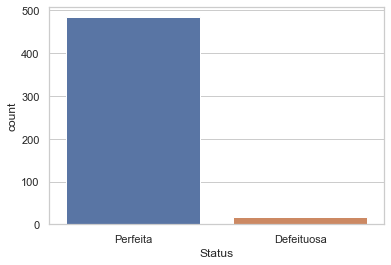

In [20]:
df['Status'].value_counts()
sns.countplot(data=df, x='Status')

#### Cálculo percentual das peças perfeitas e defeituosas

In [21]:
defeituosa = 100*df[df['Status'] == 'Defeituosa']['Status'].count() / df['Status'].count()
perfeita = 100*df[df['Status'] == 'Perfeita']['Status'].count() / df['Status'].count()

print(f'Percentual com defeito: \n {defeituosa}%')
print(f'Percentual sem defeito: \n {perfeita}%')

Percentual com defeito: 
 3.2%
Percentual sem defeito: 
 96.8%


#### Problema desbalanceado

<AxesSubplot:xlabel='Status', ylabel='count'>

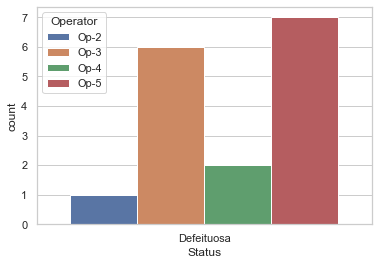

In [22]:
defective = df[df['Status'] == 'Defeituosa']['Status']
hue_op = df[df['Status'] == 'Defeituosa']['Operator']
sns.countplot(data=df, x=defective, hue=hue_op)

In [23]:
defective_op = df[df['Status'] == 'Defeituosa']['Operator'].unique()
defective_parts = df[df['Status'] == 'Defeituosa']['Operator'].value_counts()
defective_total = df['Operator'].value_counts()
defective_comparation = (defective_parts / defective_total)[defective_op]

<AxesSubplot:ylabel='Operator'>

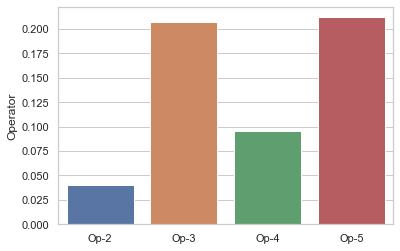

In [24]:
sns.barplot(x=defective_op, y=defective_comparation)

<AxesSubplot:>

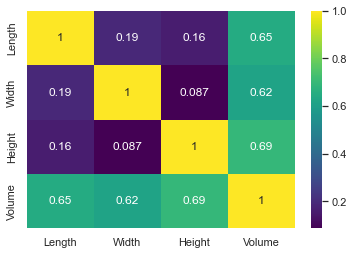

In [25]:
sns.heatmap(df.corr(), annot = True, cmap='viridis')

In [26]:
meanL = df['Length'].mean()
meanW = df['Width'].mean()
meanH = df['Height'].mean()
print(f'A média do comprimento é: \n {meanL}\n')
print(f'A média da Largura é: \n {meanW}\n')
print(f'A média da Altura é: \n {meanH}\n')

A média do comprimento é: 
 99.76913999999987

A média da Largura é: 
 49.93288

A média da Altura é: 
 20.293219999999977



Como vimos anteriormente, o fabricante tem 4% de taxa de defeitos na produção. 
Vamos considerar que o comprador decide testar 20 peças aleatórias e aceitará o fornecedor se houver 2 ou menos defeitos. 

**Qual a probabilidade de ser aceito?**

In [27]:
two_rejections = round(100 * binom.sf(2,20,0.04),2)
x_ax = np.arange(0,21)
y_ax = binom.pmf(x_ax, 20, 0.04)
y_cumulative = binom.cdf(x_ax, 20, 0.04)

In [28]:
print(f'O percentual de rejeição será: \n {two_rejections}%')

O percentual de rejeição será: 
 4.39%


#### Chances de ter x peças defeituosas por amostra.
* Por exemplo, cerca de 45% de chance de ter 0 defeituoso por amostra. 
* Cerca de 35% de chance de ter apenas 1 defeito por amostra. E assim por diante.

<AxesSubplot:title={'center':'Probabilidade de peças defeituosas por amostra'}>

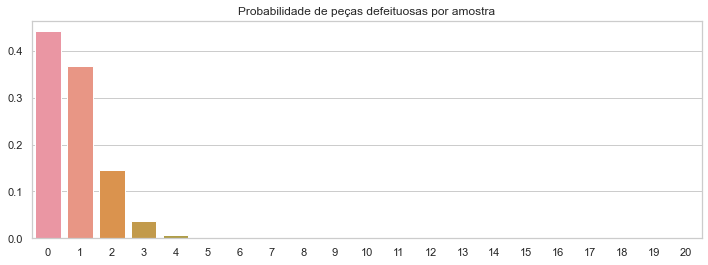

In [29]:
plt.figure(figsize=(12,4))
plt.title('Probabilidade de peças defeituosas por amostra')
sns.barplot(x=x_ax, y=y_ax)

#### Chances de ter x peças defeituosas ou menos por amostra.
* Por exemplo, cerca de 80% de chance de ter 1 peça defeituosa ou menos por amostra. 
* Cerca de 95% de chance de ter 2 peças defeituosas ou menos por amostra.

<AxesSubplot:title={'center':'Probabilidade de menos peças defeituosas por amostra'}>

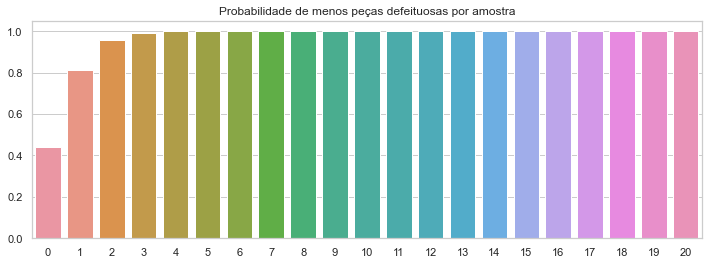

In [30]:
plt.figure(figsize=(12,4))
plt.title('Probabilidade de menos peças defeituosas por amostra')
sns.barplot(x=x_ax, y=y_cumulative)

# PRÉ PROCESSAMENTO DOS DADOS

* Verificando se temos dados perdidos

In [31]:
df.isnull().sum()

Length      0
Width       0
Height      0
Operator    0
Volume      0
Status      0
dtype: int64

#### Verificando se nós temos dados categóricos e converter eles em variáveis Dummy

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Length    500 non-null    float64
 1   Width     500 non-null    float64
 2   Height    500 non-null    float64
 3   Operator  500 non-null    object 
 4   Volume    500 non-null    float64
 5   Status    500 non-null    object 
dtypes: float64(4), object(2)
memory usage: 23.6+ KB


* Eliminaremos a coluna "Operator"
* Converteremos a coluna "Status" em variáveis Dummy

In [33]:
df = df.drop('Operator', axis = 1)
categorical = ['Status']

In [36]:
df_final = pd.get_dummies(df, columns=categorical, drop_first=True)
df_final

,Length,Width,Height,Volume,Status_Perfeita
0,102.67,49.53,19.69,100128.48,1
1,102.50,51.42,19.63,103460.90,1
2,95.37,52.25,21.51,107186.10,1
3,94.77,49.24,18.60,86796.43,1
4,104.26,47.90,19.46,97184.29,1
...,...,...,...,...,...
495,101.24,49.03,20.96,104041.19,1
496,98.37,52.12,19.68,100900.23,1
497,96.49,48.78,19.19,90323.15,1
498,94.16,48.39,21.60,98418.29,1


# DIVISÃO de TREINO e TESTE

In [37]:
X = df_final.drop('Status_Perfeita', axis=1).values
y = df_final['Status_Perfeita'].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

# Normalizando os dados

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando o Modelo

In [41]:
X_train.shape

(250, 4)

In [42]:
model = Sequential()

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.2)) #prevendo sobreajuste

model.add(Dense(6, activation="relu")) #reduzindo o número de neurônios de meio
model.add(Dropout(0.2))

model.add(Dense(3, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation="sigmoid")) #porque é uma classificação binária

model.compile(loss="binary_crossentropy", optimizer="adam")

In [43]:
model.fit(x = X_train, y = y_train, epochs = 25, validation_data=(X_test, y_test))

Epoch 1/25
8/8 [==============================] - 1s 24ms/step - loss: 0.6626 - val_loss: 0.6734
Epoch 2/25
8/8 [==============================] - 0s 6ms/step - loss: 0.6391 - val_loss: 0.6267
Epoch 3/25
8/8 [==============================] - 0s 6ms/step - loss: 0.6104 - val_loss: 0.5856
Epoch 4/25
8/8 [==============================] - 0s 5ms/step - loss: 0.5688 - val_loss: 0.5480
Epoch 5/25
8/8 [==============================] - 0s 7ms/step - loss: 0.5352 - val_loss: 0.5142
Epoch 6/25
8/8 [==============================] - 0s 6ms/step - loss: 0.5348 - val_loss: 0.4852
Epoch 7/25
8/8 [==============================] - 0s 6ms/step - loss: 0.5312 - val_loss: 0.4595
Epoch 8/25
8/8 [==============================] - 0s 5ms/step - loss: 0.4766 - val_loss: 0.4353
Epoch 9/25
8/8 [==============================] - 0s 5ms/step - loss: 0.4796 - val_loss: 0.4117
Epoch 10/25
8/8 [==============================] - 0s 5ms/step - loss: 0.4729 - val_loss: 0.3899
Epoch 11/25
8/8 [=====================

# Avaliando a performance do modelo

In [44]:
#dicionário de perdas
model.history.history

{'loss': [0.6625942587852478,
  0.6391101479530334,
  0.6103817820549011,
  0.5687611103057861,
  0.5351730585098267,
  0.5347691774368286,
  0.5312213897705078,
  0.4766005873680115,
  0.4796351492404938,
  0.4729366600513458,
  0.46535053849220276,
  0.42254382371902466,
  0.41292136907577515,
  0.45169761776924133,
  0.40679264068603516,
  0.390824556350708,
  0.3796918988227844,
  0.3993079960346222,
  0.3577149212360382,
  0.4055090844631195,
  0.3353336751461029,
  0.3761199712753296,
  0.36086732149124146,
  0.3884342610836029,
  0.3502672612667084],
 'val_loss': [0.6734437942504883,
  0.6267039179801941,
  0.5855842232704163,
  0.5479696989059448,
  0.5142304301261902,
  0.4852231442928314,
  0.4595337212085724,
  0.43530553579330444,
  0.41166767477989197,
  0.38986676931381226,
  0.37027767300605774,
  0.35244444012641907,
  0.33403852581977844,
  0.31991317868232727,
  0.3054704964160919,
  0.29260942339897156,
  0.28006255626678467,
  0.27058184146881104,
  0.26208209991455

In [45]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

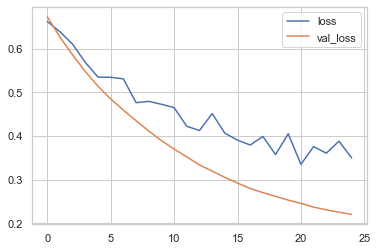

In [50]:
losses.plot()

* Criando predição do X_test set 
* Demonstrando o relatório da classificação 
* Matriz Confusão para o X_test set

In [51]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

8/8 [==============================] - 0s 1ms/step


In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.97      1.00      0.99       243

    accuracy                           0.97       250
   macro avg       0.49      0.50      0.49       250
weighted avg       0.94      0.97      0.96       250



C:\Users\dougl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dougl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dougl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
print(confusion_matrix(y_test, predictions))

[[  0   7]
 [  0 243]]


* Tivemos 97% de precisão em nosso modelo.
* Mas o modelo não teve um bom desempenho por causa dos dados muito desequilibrados e da amostra pequena.
* Sofremos com todos os recursos (precisão, recall e F1-score) para a classe 0 (zero) - defeituosos.